# BASES DESBALANCEADAS

In [1]:
import pandas as pd

In [2]:
base = pd.read_excel('BaseInadimplencia.xlsx')

X = base.drop('Situacao',axis=1)
y = base.Situacao

In [3]:
#DIMINUINDO A CLASSE MAJORITARIA (FORMA ALEATORIA)

from imblearn.under_sampling import RandomUnderSampler

In [4]:
rus = RandomUnderSampler(random_state=42)

In [5]:
y_res_under, y_res_under = rus.fit_resample(X, y)

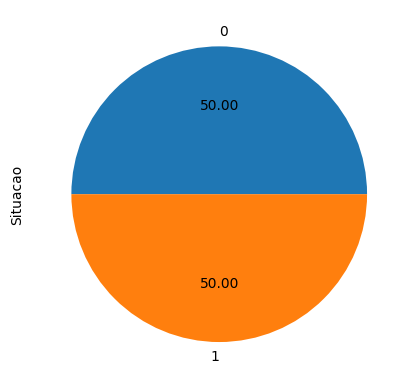

In [6]:
y_res_under.value_counts().plot.pie(autopct='%.2f');

In [7]:
y_res_under.value_counts()

0    15
1    15
Name: Situacao, dtype: int64

In [8]:
#AUMENTANDO A CLASSE MINORITÁRIA
from imblearn.over_sampling import RandomOverSampler

In [9]:
ros = RandomOverSampler(random_state=42)

In [10]:
X_res_over, y_res_over = ros.fit_resample(X,y)

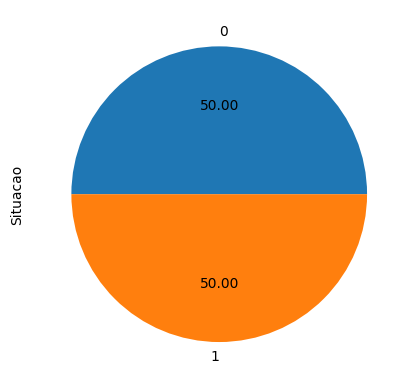

In [11]:
y_res_over.value_counts().plot.pie(autopct='%.2f');

In [12]:
import matplotlib.pyplot as plt
import numpy as np

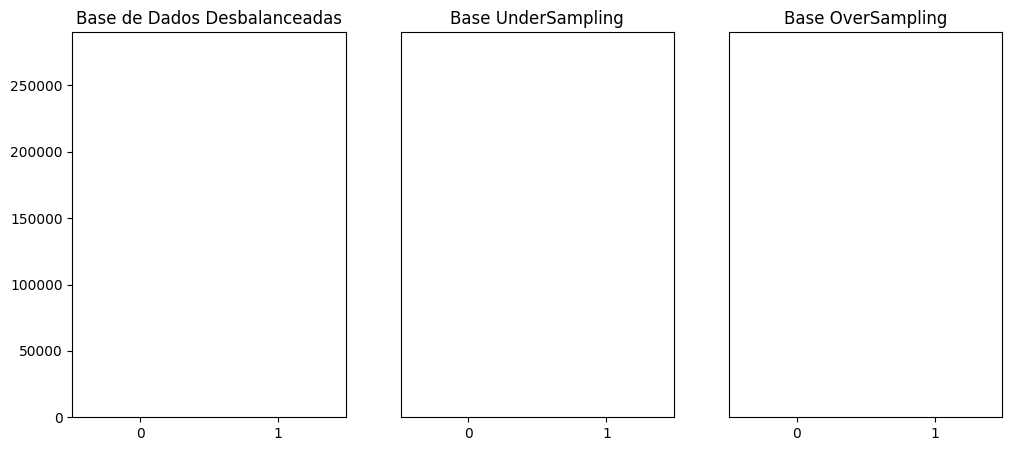

In [13]:
fig, ax = plt.subplots(ncols = 3, figsize=(12,5))

ax[0].bar(y.value_counts().index, y.value_counts().values)
ax[2].bar(y_res_over.value_counts().index, y_res_over.value_counts().values)
ax[1].bar(y_res_under.value_counts().index, y_res_under.value_counts().values)

ax[0].set(xticks=[0,1], ylim=(0, 290000))
ax[0].set_title('Base de Dados Desbalanceadas')
ax[1].set(xticks=[0,1], ylim=(0, 290000),yticks=[])
ax[1].set_title('Base UnderSampling')
ax[2].set(xticks=[0,1], ylim=(0, 290000),yticks=[])
ax[2].set_title('Base OverSampling')

plt.show()

In [14]:
y_res_over.value_counts().index

Int64Index([0, 1], dtype='int64')

In [15]:
import pandas as pd

In [16]:
base = pd.read_excel('BaseInadimplencia.xlsx')

In [17]:
X = base.drop('Situacao',axis=1)
y = base.Situacao

## - RANDOM UNDERSAMPLING

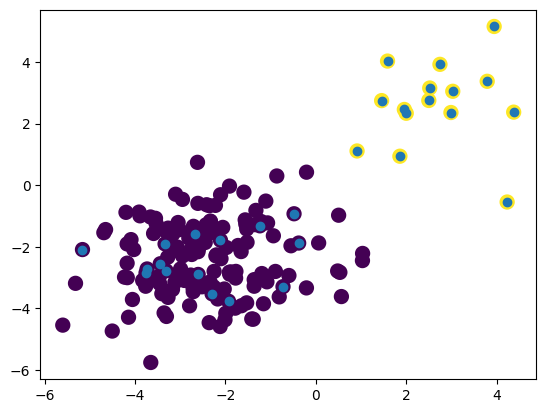

In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res_under, y_res_under = rus.fit_resample(X, y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res_under.SaldoConta, X_res_under.SaldoInvestimento, linewidths=1)

plt.show()

## CLUSTER CENTROIDS

C:\Users\Isac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Isac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


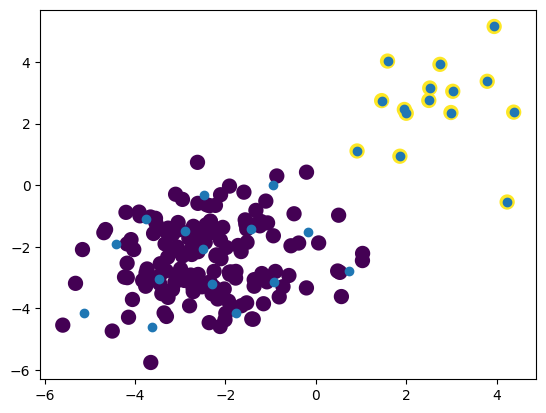

In [19]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X, y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, linewidths=1)

plt.show()

## NEAR MISS

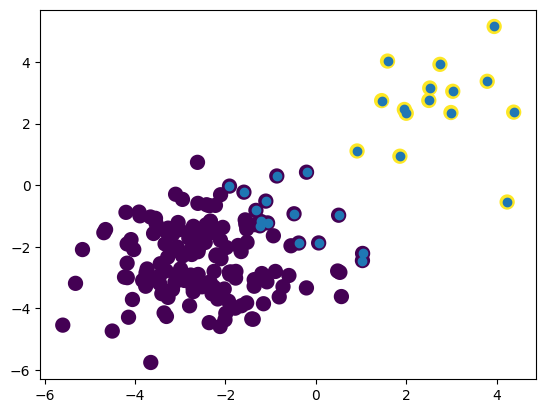

In [20]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, linewidths=1)

plt.show()

##  - RANDOM OVERSAMPLING

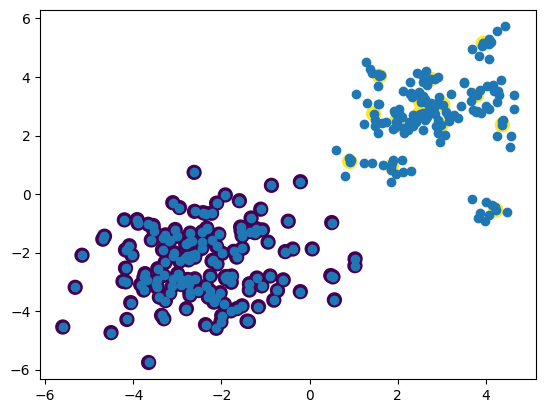

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42, shrinkage=0.6) #shrinkage altera o valor dos pontos para valores proximos
X_res_over, y_res_over = ros.fit_resample(X,y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res_over.SaldoConta, X_res_over.SaldoInvestimento, linewidths=1)

plt.show()

## SMOTE

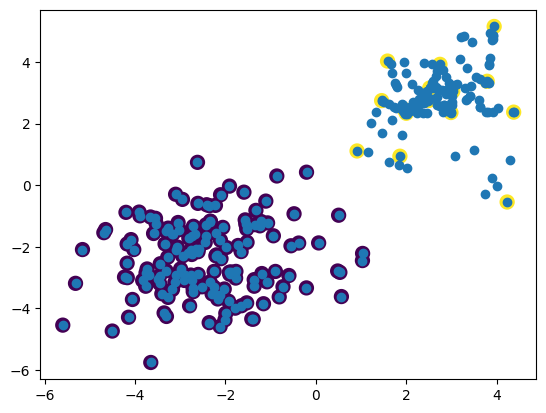

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_smote, y_res_smote = sm.fit_resample(X, y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res_smote.SaldoConta, X_res_smote.SaldoInvestimento, linewidths=1)

plt.show()

## ASASYN

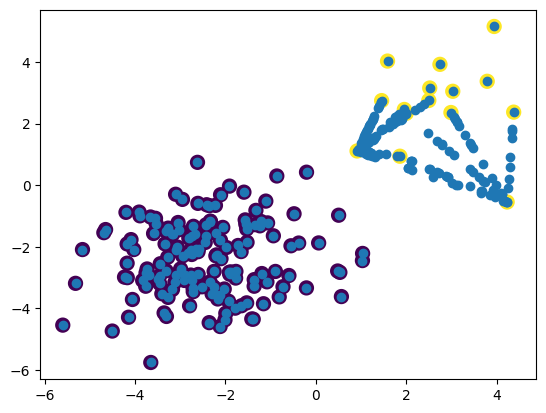

In [23]:
from imblearn.over_sampling import ADASYN # Mais proximo da classe majoritária
ada = ADASYN(random_state=42)
X_res_ada, y_res_ada = ada.fit_resample(X, y)

fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao, linewidths=5)
ax.scatter(X_res_ada.SaldoConta, X_res_ada.SaldoInvestimento, linewidths=1)

plt.show()

In [24]:
base

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0
3,-2.745822,-2.250098,0
4,-1.352205,-1.280924,0
...,...,...,...
160,1.957030,2.456683,1
161,3.790351,3.371406,1
162,3.944314,5.150743,1
163,1.454663,2.744614,1
